In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
data = pd.read_csv(
    filepath_or_buffer="data/airline_passengers.csv", 
    parse_dates=["Month"],
    infer_datetime_format=True
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [7]:
data.dropna(inplace=True)

In [12]:
data["Month"] = pd.to_datetime(data.Month)

In [14]:
data.set_index("Month", inplace=True)
data.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [17]:
data.index = data.index.to_period("M")
data.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [19]:
data.columns = [column.lower().replace(" ", "_") for column in data.columns]

In [20]:
data.head()

,thousands_of_passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


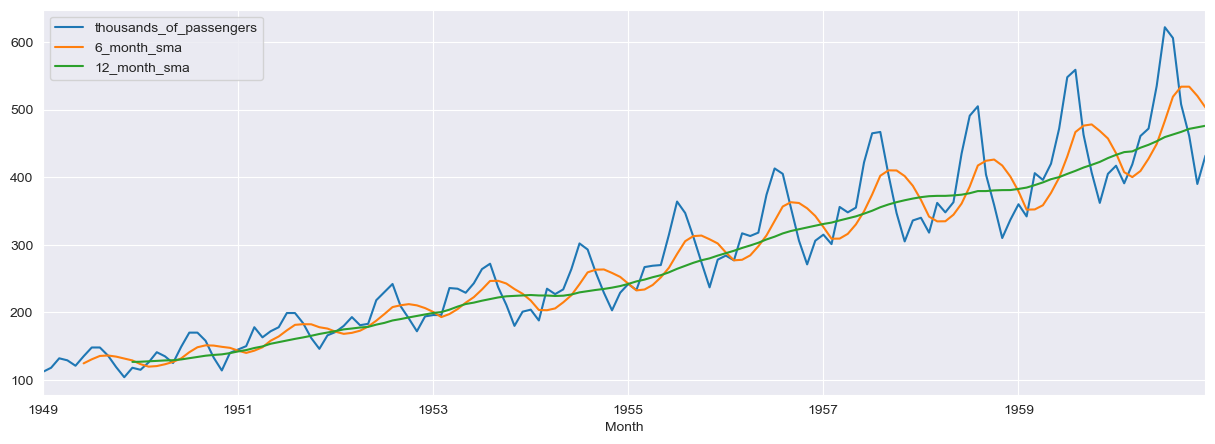

In [22]:
data["6_month_sma"] = data.thousands_of_passengers.rolling(window=6).mean()
data["12_month_sma"] = data.thousands_of_passengers.rolling(window=12).mean()

data.plot(figsize=(15, 5));

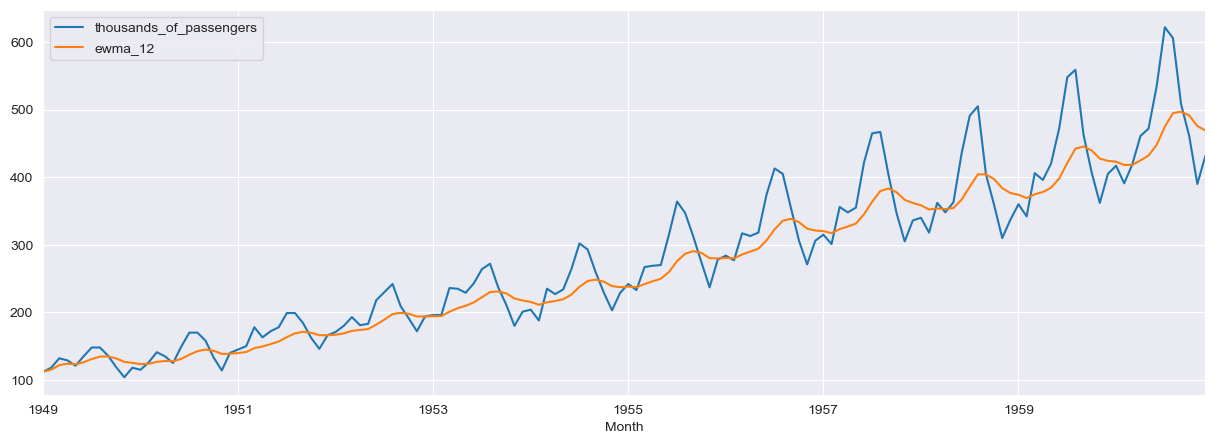

In [24]:
data["ewma_12"] = data.thousands_of_passengers.ewm(span=12).mean()
data[["thousands_of_passengers", "ewma_12"]].plot(figsize=(15, 5));